<a href="https://colab.research.google.com/github/hpsuresh12345/Python-code/blob/master/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [8]:
#loading data
path="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data=pd.read_csv(path,header=None,names=['sepal_length','sepal_width','petal_length','petal_width','class'])
train,test = train_test_split(data,test_size=0.2,random_state=7)
train.shape
train.describe()
train.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
126,6.2,2.8,4.8,1.8,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor
22,4.6,3.6,1.0,0.2,Iris-setosa
139,6.9,3.1,5.4,2.1,Iris-virginica
74,6.4,2.9,4.3,1.3,Iris-versicolor


In [10]:
#checking missing values
train.info()
#No null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 126 to 25
Data columns (total 5 columns):
sepal_length    120 non-null float64
sepal_width     120 non-null float64
petal_length    120 non-null float64
petal_width     120 non-null float64
class           120 non-null object
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


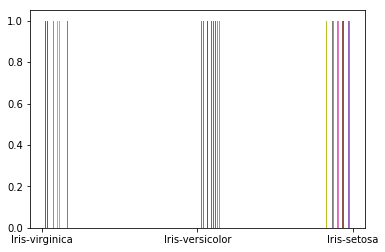

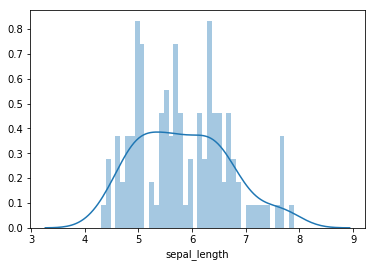

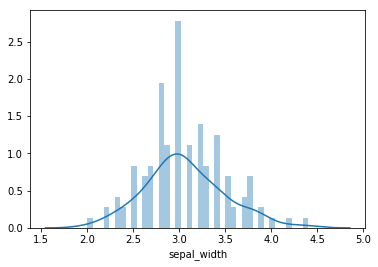

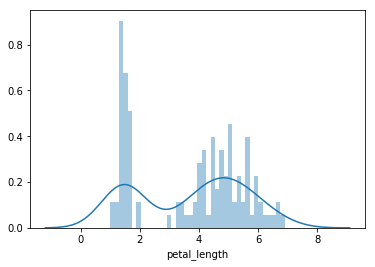

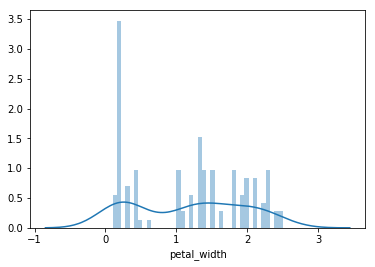

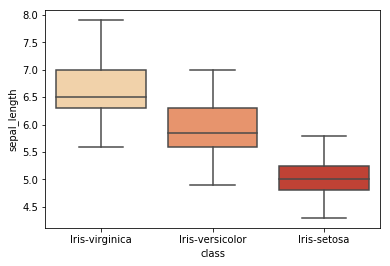

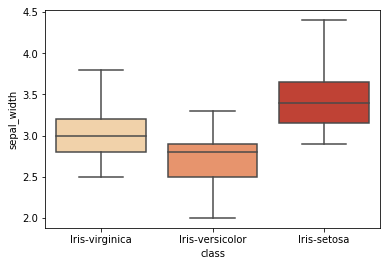

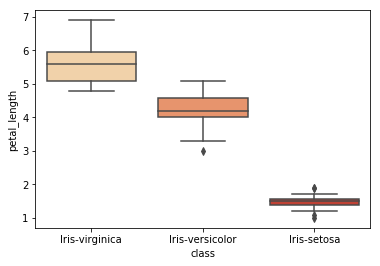

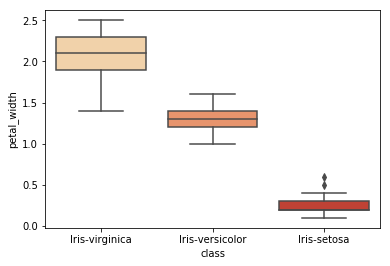

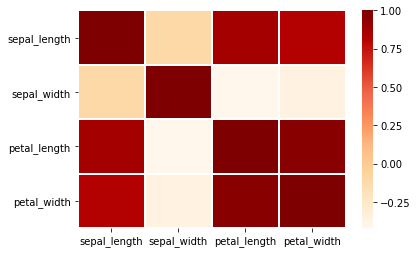

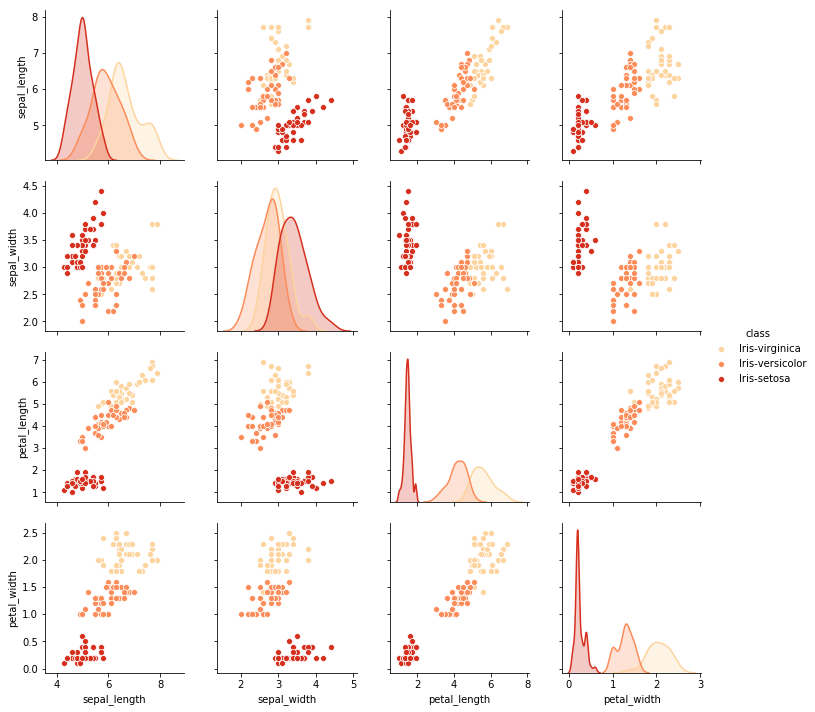

In [12]:
#Exploratory data analysis

plt.hist(train['class'])
plt.show()
sns.distplot(train['sepal_length'],kde=True,bins=40)
plt.show()

sns.distplot(train['sepal_width'],kde=True,bins=40)
plt.show()

sns.distplot(train['petal_length'],kde=True,bins=40)
plt.show()

sns.distplot(train['petal_width'],kde=True,bins=40)
plt.show()

sns.boxplot(x='class',y='sepal_length',data=train,palette='OrRd')
plt.show()
sns.boxplot(x='class',y='sepal_width',data=train,palette='OrRd')
plt.show()
sns.boxplot(x='class',y='petal_length',data=train,palette='OrRd')
plt.show()
sns.boxplot(x='class',y='petal_width',data=train,palette='OrRd')
plt.show()
sns.heatmap(data.corr(),cmap="OrRd", linecolor='white', linewidths=1)
plt.show()
sns.pairplot(train, hue='class',palette='OrRd')
plt.show()


In [13]:
#Modelling
train['class'][train['class']=='Iris-versicolor']=0
train['class'][train['class']=='Iris-setosa']=1
train['class'][train['class']=='Iris-virginica']=2
test['class'][test['class']=='Iris-versicolor']=0
test['class'][test['class']=='Iris-setosa']=1
test['class'][test['class']=='Iris-virginica']=2
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
y = pd.to_numeric(y)
y_test=pd.to_numeric(test.iloc[:,-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/li

In [0]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
scoring = 'accuracy'

In [15]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

LR: 0.966667 (0.040825)
DT: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [19]:
#lets make prediction on test data

# Make predictions on validation dataset

SVM = SVC()
SVM.fit(X,y)
predictions = SVM.predict(test.iloc[:,:-1])
predictions

KNN = KNeighborsClassifier()
KNN.fit(X,y)
predictions = KNN.predict(test.iloc[:,:-1])
predictions


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2,
       0, 0, 2, 2, 0, 0, 2, 2])